In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../..')
from gp2 import Runner

In [3]:
R = Runner(verbose=True)

*** GP2 ***
Working directory: /tmp/tmpcvsy4wxuGP2
Verbose mode active!


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/Fluorescent_Neuronal_Cells/Fluorescent_Neuronal_Cells.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/Fluorescent_Neuronal_Cells/Fluorescent_Neuronal_Cells_masks.npy')

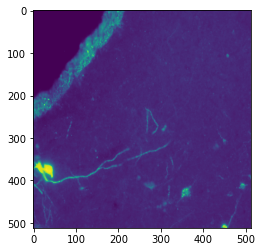

In [5]:
plt.imshow(images[1])

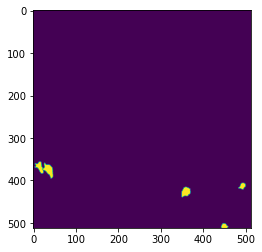

In [6]:
plt.imshow(masks[1])

In [11]:
len(images)

283

In [12]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [13]:
#
#
R.setup_data(images, masks, dataset_size=283, weights=weights)

Weights OK!


In [15]:
RUNS = 5

In [16]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    R.find_machine_labels()
    R.relabel()
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Epoch 1/100
1/1 [==============================] - 16s 16s/step - loss: 688.7335 - dice_coeff: 0.7134 - val_loss: 250.1372 - val_dice_coeff: 0.6362
Epoch 2/100
1/1 [==============================] - 0s 356ms/step - loss: -328.9041 - dice_coeff: 1.1546 - val_loss: 187.3554 - val_dice_coeff: 0.7159
Epoch 3/100
1/1 [==============================] - 0s 362ms/step - loss: -1080.3123 - dice_coeff: 1.4295 - val_loss: 131.9339 - val_dice_coeff: 0.7921
Epoch 4/100
1/1 [==============================] - 0s 367ms/step - loss: -1706.1102 - dice_coeff: 1.5838 - val_loss: 91.9194 - val_dice_coeff: 0.8507
Epoch 5/100
1/1 [==============================] - 0s 355ms/step - loss: -2181.3201 - dice_coeff: 1.6665 - val_loss: 54.1038 - val_dice_coeff: 0.9099
Epoch 6/100
1/1 [==============================] - 0s 357ms/step - loss: -2593.6606 - dice_coeff: 1.7052 - val_loss: 31.4905 - val_dice_coeff: 0.9466
Epoch 7/100
1/1 [==============================] - 0s 369ms/step - loss: -3081.8923 - dice

In [17]:
R.classifier_scores

[[-201.56130981445312, 1.2717903852462769],
 [-225.53067016601562, 1.3000315427780151],
 [-246.53582763671875, 1.3258417844772339],
 [-265.2281494140625, 1.3436616659164429],
 [-334.8204650878906, 1.3893414735794067]]

In [18]:
R.discriminator_scores

[[394.1426086425781, 0.75],
 [0.4090917110443115, 0.8125],
 [221.94296264648438, 0.75],
 [244.54798889160156, 0.8125],
 [0.2878209948539734, 0.8125]]

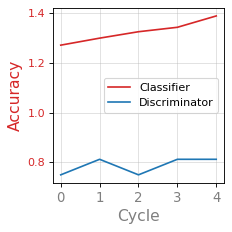

In [19]:
R.plot()